C:\Users\HP\AppData\Local\Temp\ipykernel_24520\2081482136.py:184: UserWarning: Glyph 127 () missing from current font.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_24520\2081482136.py:184: UserWarning: Glyph 128 (\x80) missing from current font.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_24520\2081482136.py:184: UserWarning: Glyph 129 (\x81) missing from current font.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_24520\2081482136.py:184: UserWarning: Glyph 130 (\x82) missing from current font.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_24520\2081482136.py:184: UserWarning: Glyph 131 (\x83) missing from current font.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_24520\2081482136.py:184: UserWarning: Glyph 132 (\x84) missing from current font.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_24520\2081482136.py:184: UserWarning: Glyph 133 (\x85) missing from current font.
  plt.tight_layo

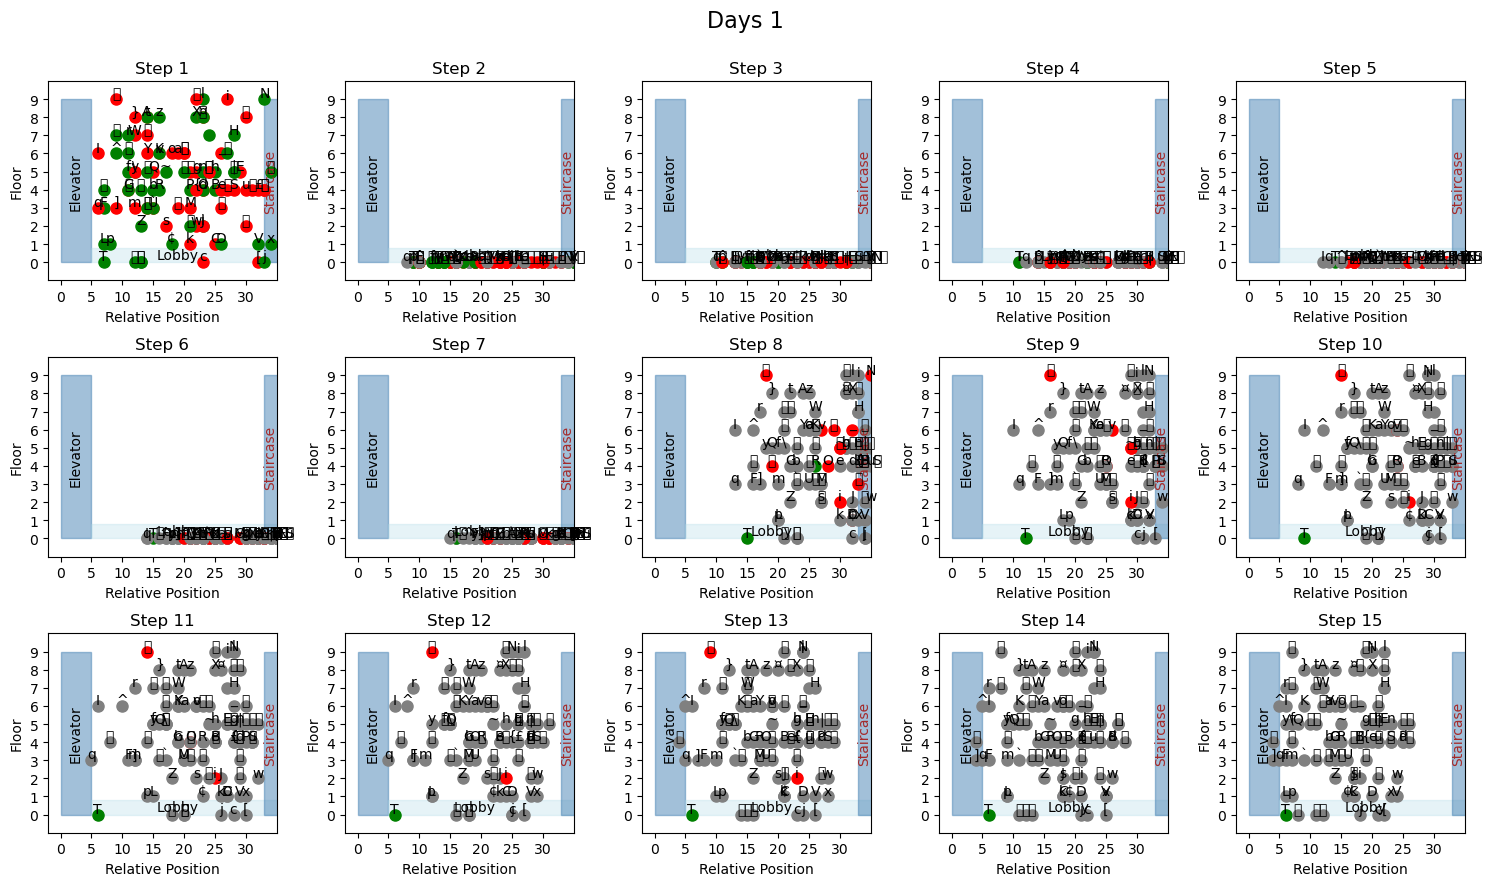


Days 1 Summary:
Total Population: 100, Susceptible: 1, Infected: 0, Recovered: 99


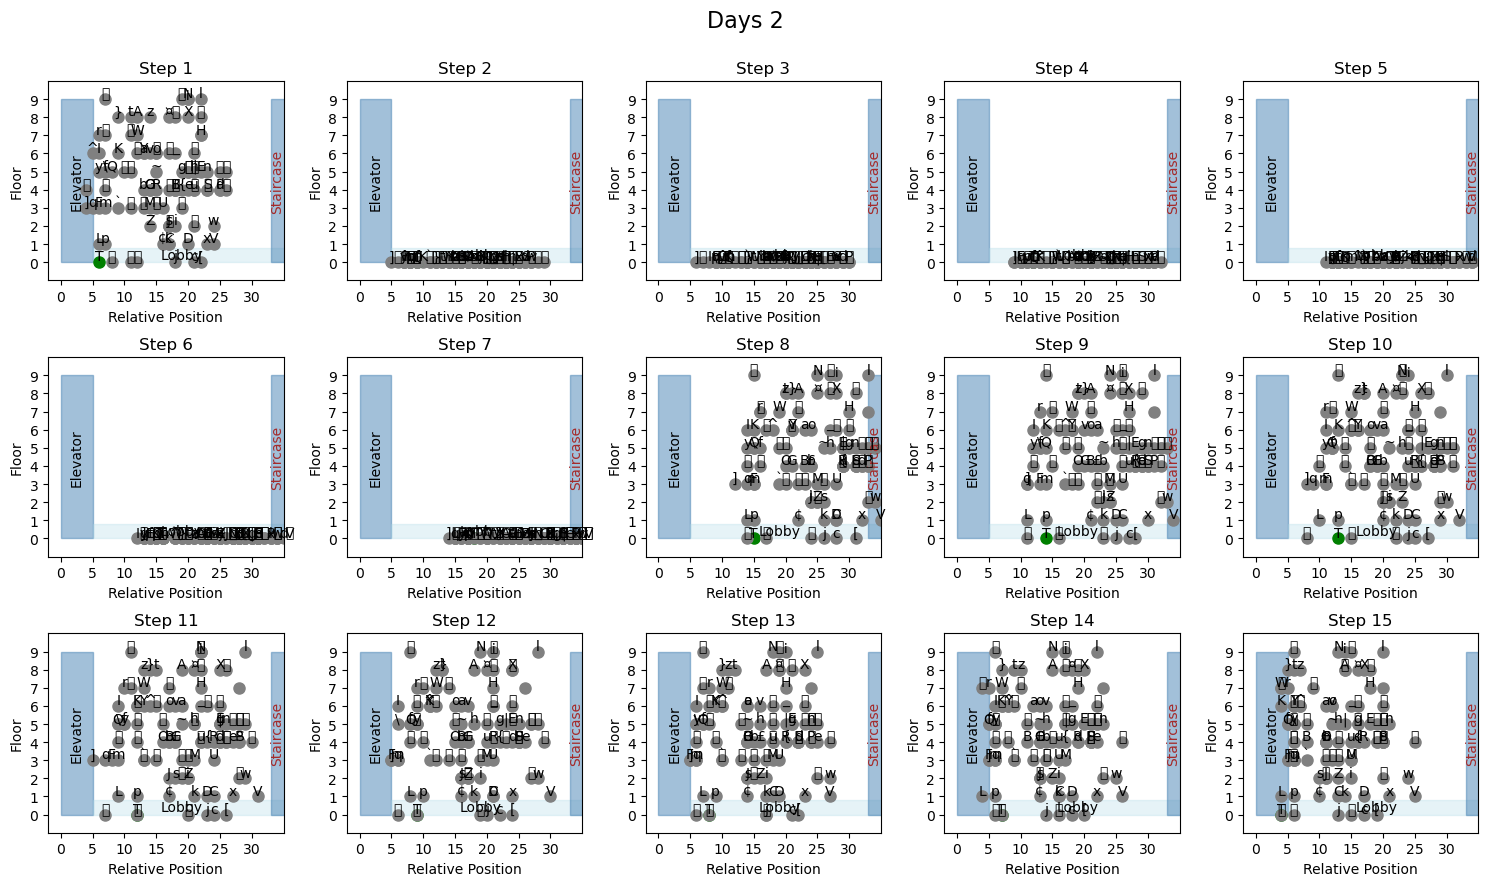


Days 2 Summary:
Total Population: 100, Susceptible: 1, Infected: 0, Recovered: 99


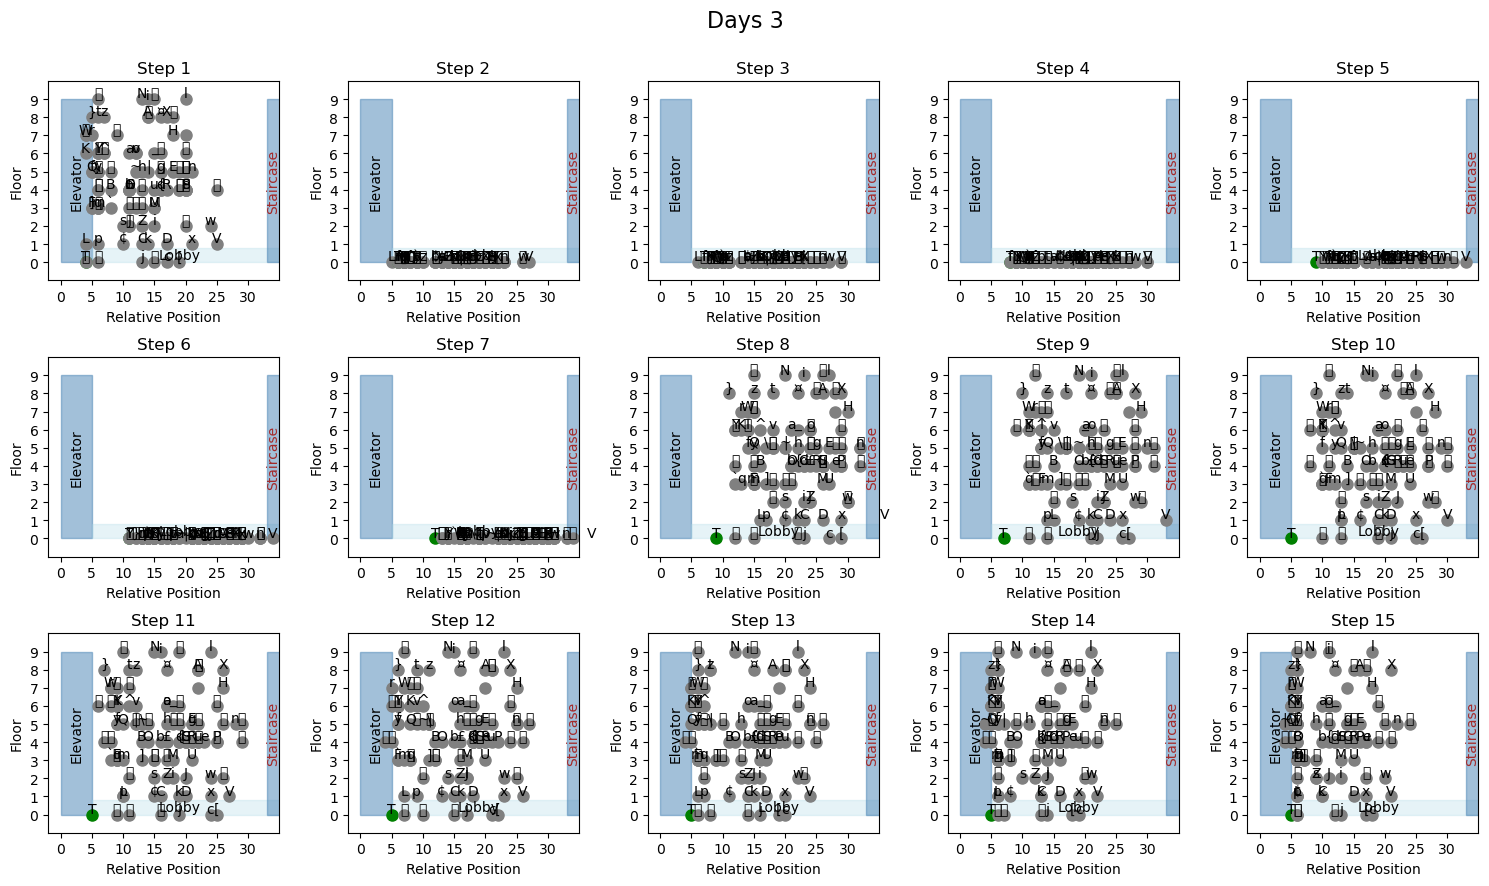


Days 3 Summary:
Total Population: 100, Susceptible: 1, Infected: 0, Recovered: 99


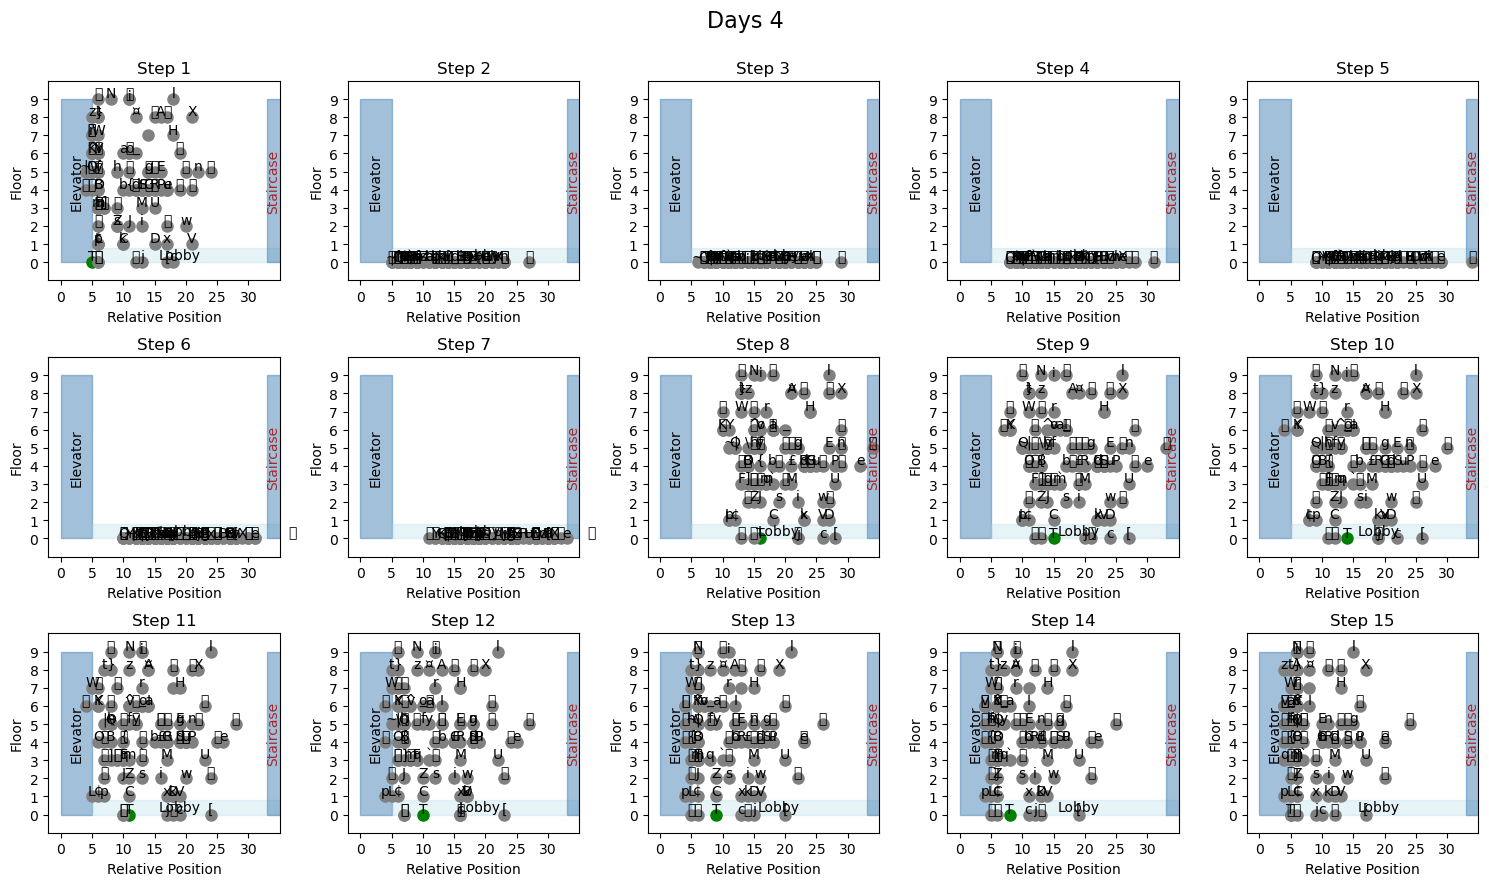


Days 4 Summary:
Total Population: 100, Susceptible: 1, Infected: 0, Recovered: 99


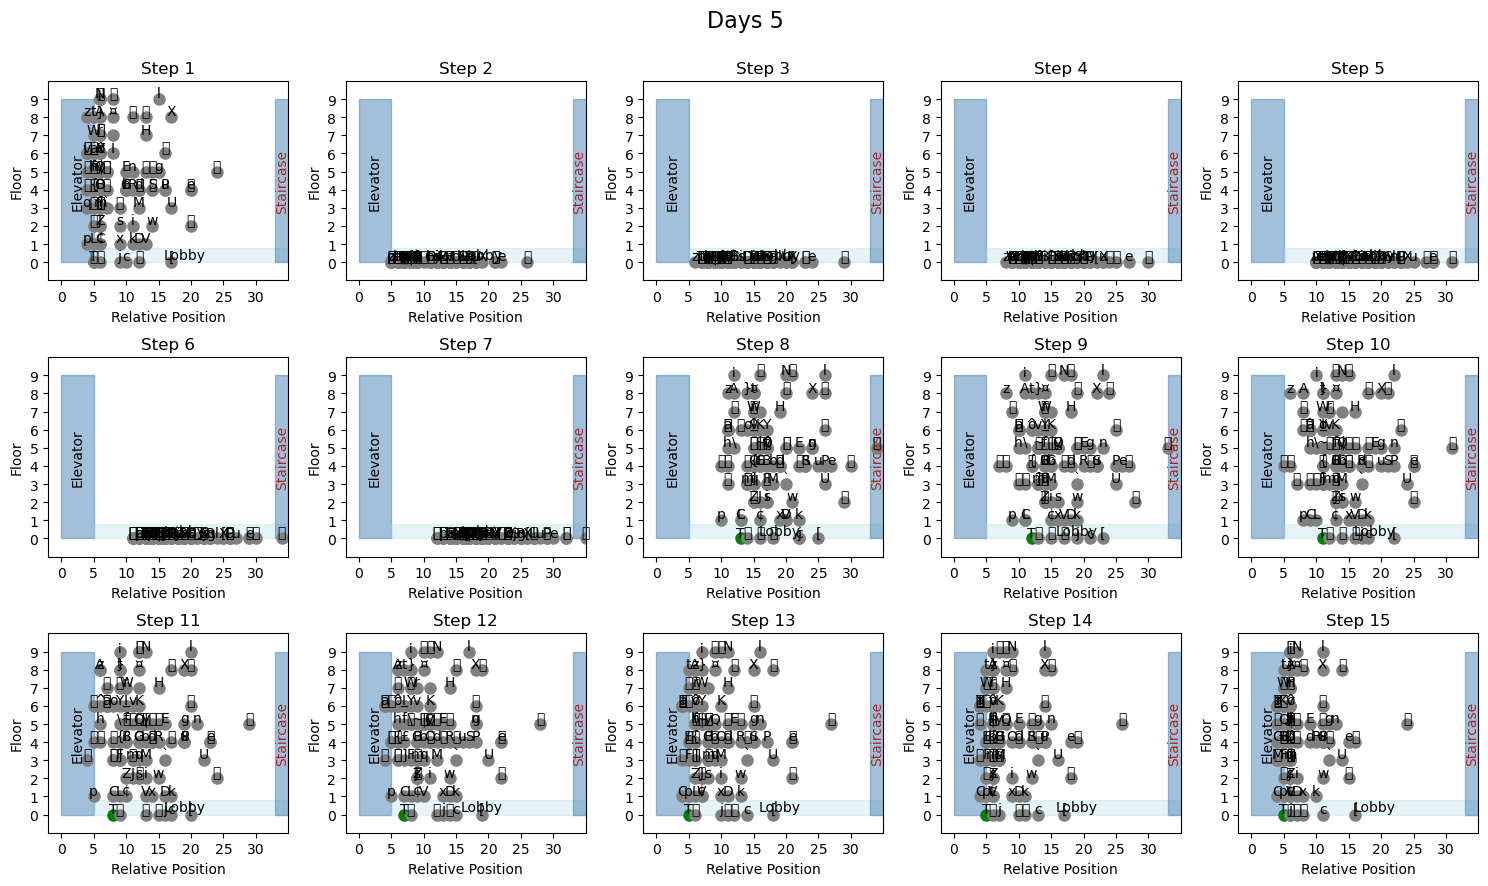


Days 5 Summary:
Total Population: 100, Susceptible: 1, Infected: 0, Recovered: 99


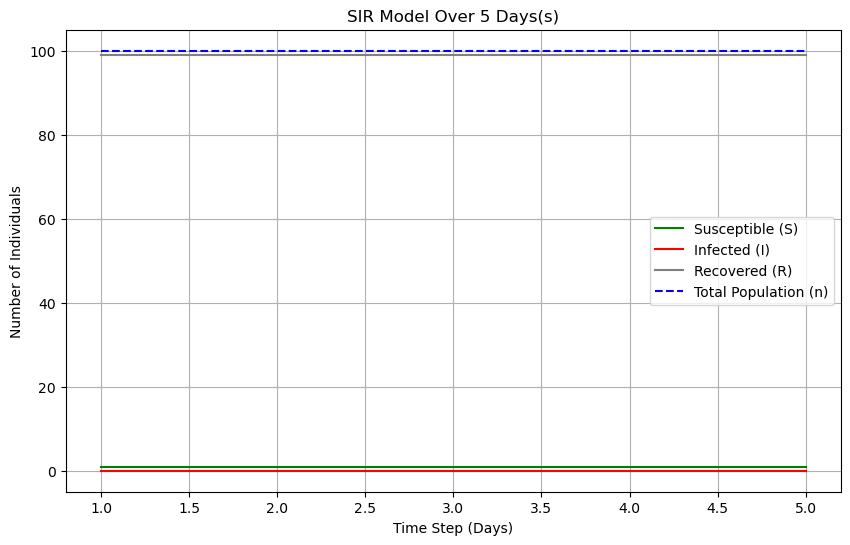

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

# Constants
num_people = 100  # Total number of particles (can be reduced for testing)
num_floors = 9
elevator_x_range = (0, 5)
people_x_start = elevator_x_range[1] + 1
people_x_end = 34
floor_y_start = 1
infection_radius = 0.3  # Threshold for infection radius
b = 0.31  # Probability of getting sick (infection rate)
k = 0.28  # Probability of recovering from sickness (recovery rate)
dt = 1  # Time step for Euler's method
immunity_waning_time = 3  # Immunity waning starts after 30 days (approx. 1 month)

# Convert units of time for simulation
time_conversion = {"days": 1, "weeks": 7, "months": 30}  # Conversion factors

class Particle:
    def __init__(self, label, x_pos, y_pos, sick=False):
        self.label = label
        self.x_pos = x_pos
        self.y_pos = y_pos
        self.sick = sick
        self.immunity = False  # No immunity initially
        self.immunity_start_time = 0  # Track when immunity starts

    def move(self, step_size):
        randomizer = random.randint(0, 3)
        if randomizer == 0:
            self.x_pos += step_size
        elif randomizer == 1:
            self.x_pos += step_size * 2
        elif randomizer == 2:
            self.x_pos += step_size * 3
        else:
            self.x_pos += step_size

    def recover(self):
        if self.sick and random.random() < k:
            self.sick = False
            self.immunity = True
            self.immunity_start_time = 0

    def immunity_wane(self, immunity_waning_threshold):
        if self.immunity:
            self.immunity_start_time += dt
            if self.immunity_start_time >= immunity_waning_threshold:
                self.immunity = False
                self.sick = False  # Change to susceptible (green) but not sick


class Simulation:
    def __init__(self, num_people, num_units, time_unit):
        self.num_people = num_people
        self.num_units = num_units
        self.time_unit = time_unit
        self.particles = self.create_particles()
        self.SIR_data = []  # To store S, I, R counts for each time step
        self.n_data = []  # To store the total population at each time step
        self.time_step = time_conversion[self.time_unit]  # Convert to days, weeks, or months

    def create_particles(self):
        particles = []
        for i in range(self.num_people):
            x_pos = random.randint(people_x_start, people_x_end)
            y_pos = random.randint(0, num_floors)
            label = chr(ord('A') + i)
            sick = True if i % 2 == 0 else False  # Make the first particle sick
            particle = Particle(label, x_pos, y_pos, sick)
            particles.append(particle)
        return particles

    def plot_matrix(self, ax, step):
        ax.clear()  # Clear previous plot
        ax.set_xticks(np.arange(0, 35, 5))
        ax.set_yticks(np.arange(0, num_floors + 1, 1))
        ax.set_xlim(-2, 35)
        ax.set_ylim(-1, num_floors + 1)
        ax.set_xlabel('Relative Position')
        ax.set_ylabel('Floor')
        ax.set_title(f'Step {step + 1}')  # Step title

        # Elevator space
        ax.add_patch(plt.Rectangle((elevator_x_range[0], 0), elevator_x_range[1], num_floors, color='#4682B4', alpha=0.5))
        ax.text(2.5, num_floors / 2, 'Elevator', color='black', fontsize=10, ha='center', va='center', rotation=90)

        # Lobby
        ax.add_patch(plt.Rectangle((elevator_x_range[1], 0), 35, 0.8, color='lightblue', alpha=0.3))
        ax.text(19, 0.4, 'Lobby', color='black', fontsize=10, ha='center', va='center')

        # Staircase space
        ax.add_patch(plt.Rectangle((33, 0), elevator_x_range[1], num_floors, color='#4682B4', alpha=0.5))
        ax.text(34, num_floors / 2, 'Staircase', color='brown', fontsize=10, ha='center', va='center', rotation=90)

        # Plot each particle with their respective color and label
        for particle in self.particles:
            if particle.immunity:  # Recovered particles
                color = 'grey'
            elif particle.sick:  # Sick particles
                color = 'red'
            else:  # Healthy particles (susceptible)
                color = 'green'
            ax.plot(particle.x_pos, particle.y_pos, 'o', markersize=8, color=color)
            ax.text(particle.x_pos, particle.y_pos + 0.1, particle.label, color='black', fontsize=10, ha='center')

    def check_infection(self):
        for i, p1 in enumerate(self.particles):
            if p1.sick:  # Only sick people can spread infection
                for j, p2 in enumerate(self.particles):
                    if i != j:  # Skip self comparison
                        # Calculate Euclidean distance
                        dist = np.sqrt((p1.x_pos - p2.x_pos)**2 + (p1.y_pos - p2.y_pos)**2)
                        if dist < infection_radius and not p2.sick and not p2.immunity:  # If within infection radius, not sick and not immune
                            if random.random() < b:  # Chance of getting sick
                                p2.sick = True

    def count_population(self, day):
        susceptible = sum(1 for p in self.particles if not p.sick and not p.immunity)
        infected = sum(1 for p in self.particles if p.sick)
        recovered = sum(1 for p in self.particles if p.immunity)
        total = len(self.particles)
        print(f"\n{self.time_unit.capitalize()} {day + 1} Summary:")
        print(f"Total Population: {total}, Susceptible: {susceptible}, Infected: {infected}, Recovered: {recovered}")
        return susceptible, infected, recovered

    def move_particles(self):
        for day in range(self.num_units):
            fig, axes = plt.subplots(3, 5, figsize=(15, 9))  # Fixed 3x5 subplots for each day
            axes = axes.flatten()  # Flatten the axes array to easily index it

            # Set the aspect ratio for all subplots to ensure consistent size
            for ax in axes:
                ax.set_aspect('auto')

            total_steps = len(axes)
            forward_steps = total_steps // 2
            target_x, target_y = 35, 0
            default_x = 3

            # Show the initial positions on the first plot
            self.plot_matrix(axes[0], 0)
            time.sleep(0.5)  # Pause for visualization of starting positions

            # Starting forward motion
            for i in range(1, total_steps):  # Start from the second plot (index 1)
                for particle in self.particles:
                    # Store original positions
                    if i == 1:  # Store original positions only once
                        particle.x_start = particle.x_pos
                        particle.y_start = particle.y_pos

                    if i < forward_steps:
                        # Forward motion (towards the lobby)
                        if particle.x_pos < target_x:
                            particle.move(1)  # Move the particle forward
                        if particle.y_pos > target_y:
                            particle.y_pos -= particle.y_pos
                    else:
                        # Reverse motion (towards the starting position)
                        if particle.x_pos > 6:
                            particle.move(-1)  # Move the particle backward
                        if particle.y_pos < particle.y_start:
                            particle.y_pos = particle.y_start

                # Check infection and recovery at each step using Euler's method
                self.check_infection()

                # Handle recovery and immunity waning
                for particle in self.particles:
                    immunity_waning_threshold = self.get_immunity_waning_threshold()
                    particle.recover()
                    particle.immunity_wane(immunity_waning_threshold)

                self.plot_matrix(axes[i], i)
                # Pause to allow visualization
                time.sleep(0.2)

            # After each day (figure), show the figure with subplots
            plt.suptitle(f"{self.time_unit.capitalize()} {day + 1}", fontsize=16)  # Title for the whole day
            plt.tight_layout()
            plt.subplots_adjust(top=0.9)  # Adjust layout to make room for the suptitle
            plt.show()  # Show the plot for the current day

            # After all steps for the day, count the population and print summary
            susceptible, infected, recovered = self.count_population(day)
            self.SIR_data.append((susceptible, infected, recovered))  # Store the SIR counts
            self.n_data.append(self.num_people)  # Store total population, which remains constant

    def get_immunity_waning_threshold(self):
        if self.time_unit == "days":
            return 30000 
        elif self.time_unit == "weeks":
            return 400
        elif self.time_unit == "months":
            return 1  # Immunity wanes after 1 month if in months


# Run the simulation
simulation = Simulation(num_people, num_units=5, time_unit="days")
simulation.move_particles()

# Line plot of the SIR data
susceptible_data, infected_data, recovered_data = zip(*simulation.SIR_data)

# Plotting the SIR curve
plt.figure(figsize=(10, 6))

# Plot the data, using the time step starting from 1
plt.plot(range(1, len(susceptible_data) + 1), susceptible_data, label='Susceptible (S)', color='green')
plt.plot(range(1, len(infected_data) + 1), infected_data, label='Infected (I)', color='red')
plt.plot(range(1, len(recovered_data) + 1), recovered_data, label='Recovered (R)', color='grey')
plt.plot(range(1, len(simulation.n_data) + 1), simulation.n_data, label='Total Population (n)', color='blue', linestyle='--')  # Total population curve

# Add the unit for the time step (e.g., 'days', 'weeks', 'months')
plt.xlabel(f'Time Step ({simulation.time_unit.capitalize()})')  # Include units in the x-axis label
plt.ylabel('Number of Individuals')
plt.title(f'SIR Model Over {5} {simulation.time_unit.capitalize()}(s)')
plt.legend()
plt.grid(True)
plt.show()


In [114]:
import unittest
from unittest.mock import patch
import random
import numpy as np
import matplotlib.pyplot as plt

# Assume the Simulation code (Particle, Simulation classes) is already provided above.

# Test Suite for the Simulation
class TestParticleMovement(unittest.TestCase):
    def setUp(self):
        # Create a particle at a fixed position
        self.particle = Particle(label="A", x_pos=5, y_pos=3)

    @patch('random.randint', return_value=2)  # Mocking random.randint to always return 2
    def test_move_larger_step(self, mock_randint):
        initial_x = self.particle.x_pos
        self.particle.move(2)  # Move by 2 units
        self.assertEqual(self.particle.x_pos, initial_x + 6)  # Expect 3 * step_size

    @patch('random.randint', return_value=0)  # Mocking random.randint to always return 0
    def test_move_no_step(self, mock_randint):
        initial_x = self.particle.x_pos
        self.particle.move(2)  # Move by 2 units
        self.assertEqual(self.particle.x_pos, initial_x + 2)  # Expect no change since step_size should remain 1


class TestParticleRecovery(unittest.TestCase):
    def setUp(self):
        # Create a sick particle
        self.particle = Particle(label="A", x_pos=5, y_pos=3, sick=True)

    @patch('random.random', return_value=0.5)  # Mocking random.random to always return 0.5 (mid-probability)
    def test_recover(self, mock_random):
        self.particle.recover()
        self.assertFalse(self.particle.sick)  # Should no longer be sick
        self.assertTrue(self.particle.immunity)  # Should be immune
        self.assertEqual(self.particle.immunity_start_time, 0)  # Immunity should start time at 0

    @patch('random.random', return_value=0.9)  # Mocking random.random to simulate a recovery failure
    def test_no_recover(self, mock_random):
        self.particle.recover()
        self.assertTrue(self.particle.sick)  # Should remain sick if probability is not met
        self.assertFalse(self.particle.immunity)  # Should not become immune


# Manually run tests in Jupyter, avoiding automatic `unittest.main()` detection conflict.
def run_tests():
    # Manually create a test suite and run it.
    suite = unittest.TestLoader().loadTestsFromTestCase(TestParticleMovement)
    suite.addTests(unittest.TestLoader().loadTestsFromTestCase(TestParticleRecovery))  # Keeping only the failing test here

    runner = unittest.TextTestRunner()
    runner.run(suite)

run_tests()


...F
FAIL: test_recover (__main__.TestParticleRecovery.test_recover)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\unittest\mock.py", line 1390, in patched
    return func(*newargs, **newkeywargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_24520\2759934985.py", line 36, in test_recover
    self.assertFalse(self.particle.sick)  # Should no longer be sick
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: True is not false

----------------------------------------------------------------------
Ran 4 tests in 0.030s

FAILED (failures=1)
